# Analizar datos de ventas pre y post pandemia para identificar patrones y tendencias

#LIMPIEZA DE DATOS

IMPORTAR LIBRERIAS Y DATA

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pypalettes
from pypalettes  import load_cmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 17.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pypalettes: filename=pypalettes-0.1.3-py3-none-any.whl size=370966 sha256=984689afe86b09fe5387e2212f9f2c0bde424b09bb46fdd5a80e1ff889b6f6ee
  Stored in directory: /root/.cache/pip/wheels/fc/83/46/e3ee129913705de56292a4210f699d8252e2a790e432d35555
Successfully built pypalettes


In [ ]:
#Importamos data y creamos una copia por si cometemos errores
data0 = pd.read_excel("Adidas US Sales Datasets.xlsx")
data1 = data0.copy()
data1.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [ ]:
#Informacion general tabla
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [ ]:
#Sumar cuantos valores nulos hay en cada columna
#Vemos que la columna "Unnamed: 0" esta entera llena de na
data1.isna().sum()

,0
Unnamed: 0,9652
Unnamed: 1,3
Unnamed: 2,2
Unnamed: 3,3
Unnamed: 4,3
Unnamed: 5,3
Unnamed: 6,3
Unnamed: 7,3
Unnamed: 8,3
Unnamed: 9,3


In [ ]:
#Eliminamos toda la 1ª columna que contiene solo valores na y aplicamos
data1.dropna(axis="columns", how="all", inplace = True)

#Ver si hay filas duplicadas
data1.duplicated().value_counts()  #Hay una fila duplicada, posiblemente seran filas indice 1 y 2

,count
False,9651
True,1


In [ ]:
#Imprimir que filas contiene algun na
data1[data1.isna().any(axis=1)]

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Borramos filas que contengan na y aplicamos
data1.dropna(axis="index", how="any", inplace = True)
data1.head(3)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store


In [ ]:
#Renombrar columnas y eliminar fila con nombre de columnas
column_names = data1.iloc[0].values
data1.columns = column_names
data1 = data1[1:]

#Restablecer indice
data1.reset_index(drop=True, inplace=True)

#Quitar guion de columna Sales Method
data1.loc[:, "Sales Method"] = data1["Sales Method"].str.replace("-", " ")

#Columnas en minuscula y quitar espacios
data1.columns = data1.columns.str.lower()
data1.columns = data1.columns.str.replace(" ", "_")

#Mover columna id al principio
move_column = "retailer_id"
first_column = data1.pop(move_column)
data1.insert(0, move_column, first_column)
data1.head(1)

,retailer_id,retailer,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,1185732,Foot Locker,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In store


CAMBIAR TIPO DE DATOS

In [ ]:
#Columnas numericas
data1["retailer_id"] = pd.to_numeric(data1["retailer_id"]).astype(int)
data1["price_per_unit"] = pd.to_numeric(data1["price_per_unit"]).astype(int)
data1["units_sold"] = pd.to_numeric(data1["units_sold"]).astype(int)
data1["total_sales"] = pd.to_numeric(data1["total_sales"]).astype(int)
data1["operating_profit"] = pd.to_numeric(data1["operating_profit"]).astype(int)

#Columna float
data1["operating_margin"] = pd.to_numeric(data1["operating_margin"]).astype(float)

#Columna fecha
data1["invoice_date"] = pd.to_datetime(data1["invoice_date"])

<ipython-input-9-9178d22b5a82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["retailer_id"] = pd.to_numeric(data1["retailer_id"]).astype(int)


COMPROBAR QUE LOS DATOS ESTAN LIMPIOS Y COMPLETOS

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer_id       9648 non-null   int64         
 1   retailer          9648 non-null   object        
 2   invoice_date      9648 non-null   datetime64[ns]
 3   region            9648 non-null   object        
 4   state             9648 non-null   object        
 5   city              9648 non-null   object        
 6   product           9648 non-null   object        
 7   price_per_unit    9648 non-null   int64         
 8   units_sold        9648 non-null   int64         
 9   total_sales       9648 non-null   int64         
 10  operating_profit  9648 non-null   int64         
 11  operating_margin  9648 non-null   float64       
 12  sales_method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 980.0+ KB


In [ ]:
#Contar si hay filas duplicadas
data1.duplicated().value_counts()

,count
False,9648


In [ ]:
data1.isna().sum()

,0
retailer_id,0
retailer,0
invoice_date,0
region,0
state,0
city,0
product,0
price_per_unit,0
units_sold,0
total_sales,0


In [ ]:
#Hacer copia para tener un recovery
df = data1.copy()

#Ver df final
df.head(5)

,retailer_id,retailer,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,1185732,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In store
1,1185732,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In store
2,1185732,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In store
3,1185732,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In store
4,1185732,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In store


In [ ]:
df.describe()

,retailer_id,invoice_date,price_per_unit,units_sold,total_sales,operating_profit,operating_margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.182214,256.930037,93273.403089,34424.911692,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.000000,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.000000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.000000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.698080,214.252030,141915.997157,54193.216234,0.097197


In [ ]:
#Añadir columnas con datos diarios, mensuales y anuales
df["day"] =df["invoice_date"].dt.day
df["month"] =df["invoice_date"].dt.month
df["year"] =df["invoice_date"].dt.year
df["day_name"] = df["invoice_date"].dt.day_name()
df.sample(1)

,retailer_id,retailer,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method,day,month,year,day_name
5193,1128299,Foot Locker,2021-04-10,West,Hawaii,Honolulu,Men's Street Footwear,59,130,7670,2761,0.36,Online,10,4,2021,Saturday


In [ ]:
#Eliminar columnas inservibles
df.drop(columns= ["invoice_date", "retailer_id"], inplace=True)

In [ ]:
df.sample(1)

,retailer,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method,day,month,year,day_name
4043,West Gear,West,California,San Francisco,Women's Athletic Footwear,58,174,10092,4339,0.43,Online,22,12,2020,Tuesday


# Graficas

## Comparacion ventas por años

Ver ventas anuales y sus cambios entre años segun cadena vendedora, tipo producto, ciudades y estados.

---



In [ ]:
#CREAMOS UNA FUNCION A LA QUE IREMOS LLAMANDO PARA GRAFICAR
def bar(groupby_cols, agg_col, kind, xlabel, ylabel, savefig, agg="sum", cmap="Ernst", figsize=(8, 6), stacked=False):
    # Agrupación personalizada y agregación de los valores
    grouped_data = df.groupby(groupby_cols)[agg_col].agg(agg).unstack()

    # Ordenar los datos según la suma de la columna de agregación (de forma descendente)
    grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

    # Graficar los datos
    ax = grouped_data.plot(kind=kind, cmap=load_cmap(cmap), figsize=figsize, stacked=stacked)

    # Personalización del gráfico
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    # Configuración de los spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 5))
    ax.spines['bottom'].set_position(('outward', 5))

    # Ajustar el diseño
    plt.tight_layout()

    #Guardar grafico
    plt.savefig(savefig, dpi=300, bbox_inches='tight')

    # Mostrar el gráfico
    plt.show()

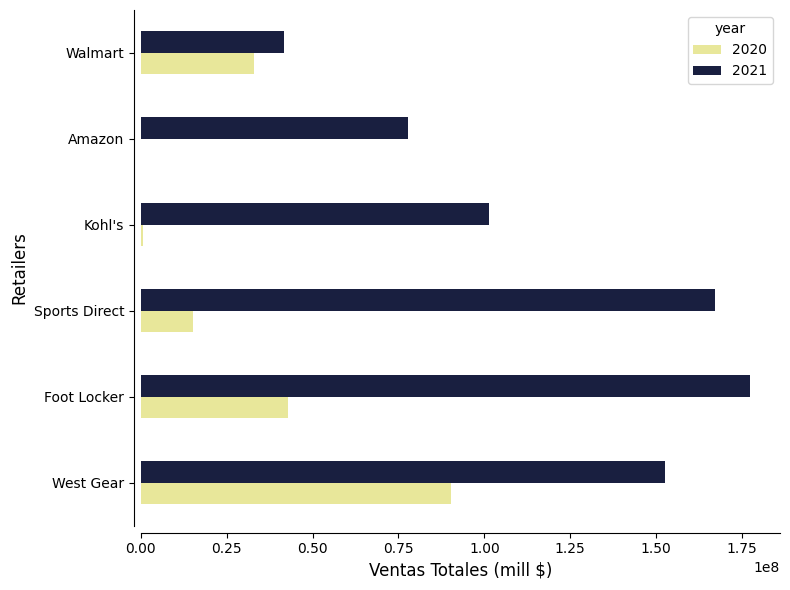

In [ ]:
bar(
    groupby_cols=["retailer", "year"],
    agg_col="total_sales",
    kind="barh",
    xlabel="Ventas Totales (mill $)",
    ylabel="Retailers",
    savefig="ventas anuales retailer.png"
)

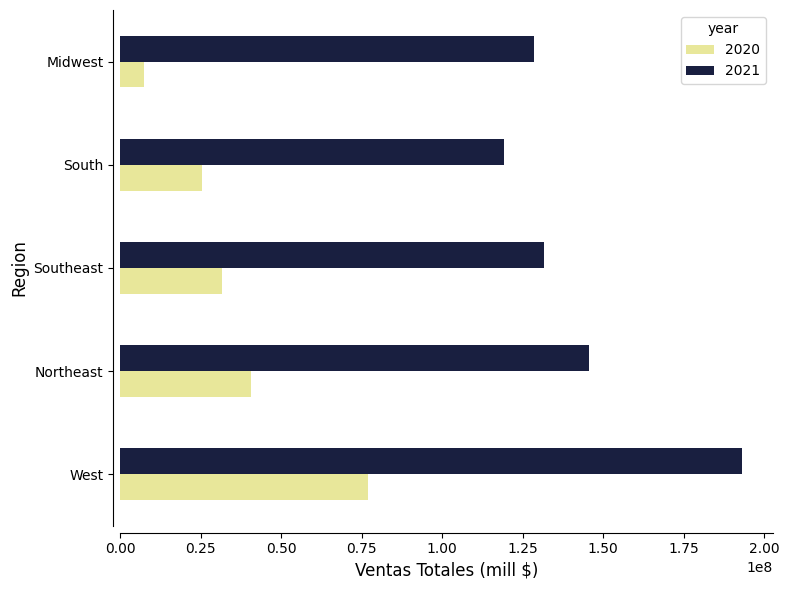

In [ ]:
bar(
    groupby_cols=["region", "year"],
    agg_col="total_sales",
    kind="barh",
    xlabel="Ventas Totales (mill $)",
    ylabel="Region",
    savefig="ventas anuales region.png"
)

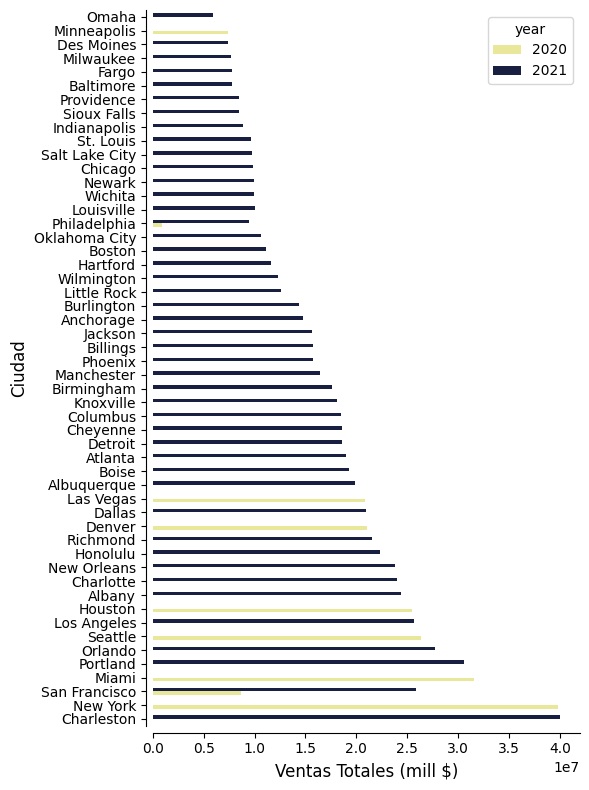

In [ ]:
bar(
    groupby_cols=["city", "year"],
    agg_col="total_sales",
    kind="barh",
    xlabel="Ventas Totales (mill $)",
    ylabel="Ciudad",
    figsize = (6, 8),
    savefig = "ventas ciudad año.png"
)

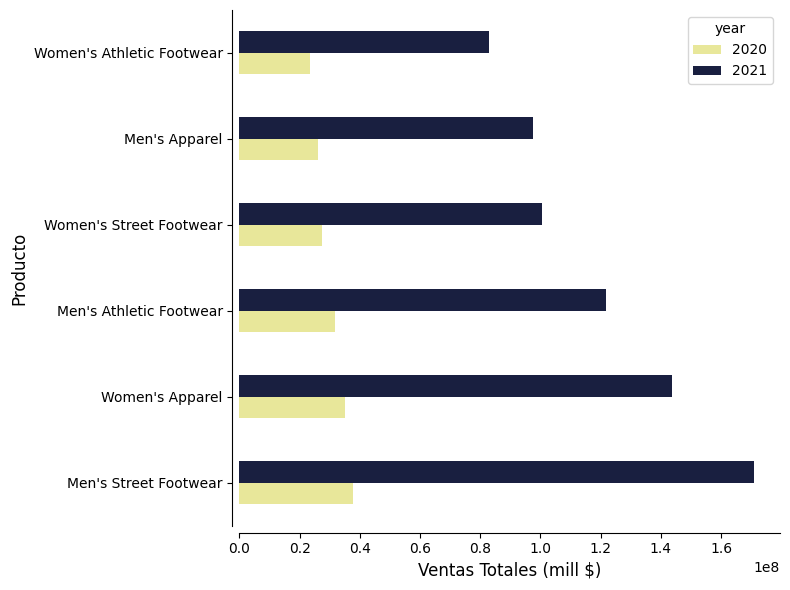

In [ ]:
bar(
    groupby_cols=["product", "year"],
    agg_col="total_sales",
    kind="barh",
    xlabel="Ventas Totales (mill $)",
    ylabel="Producto",
    savefig="ventas anuales producto.png"
)

##Ventas Anuales

Ver total ventas anuales y segmentado por tiendas donde han sido vendidas

---

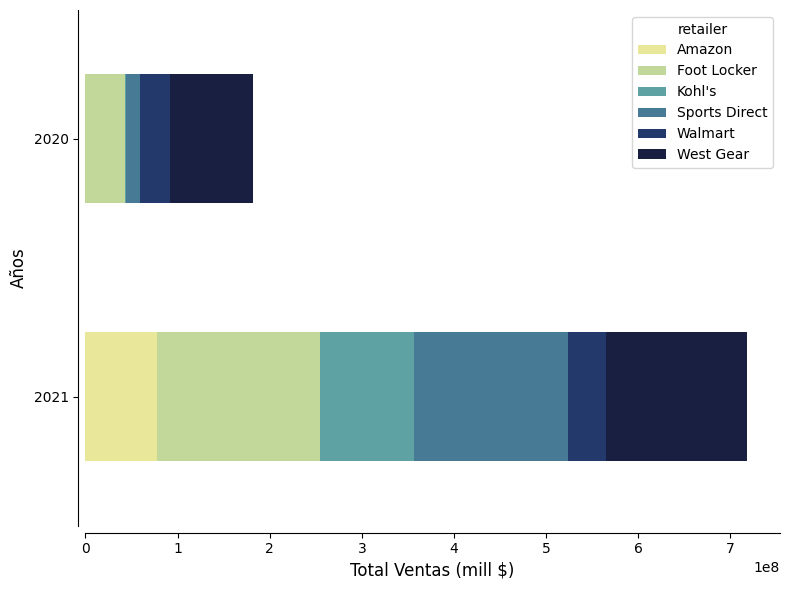

In [ ]:
bar(
    groupby_cols=["year", "retailer"],
    agg_col="total_sales",
    kind="barh",
    xlabel="Total Ventas (mill $)",
    ylabel="Años",
    stacked=True,
    savefig="ventas anuales.png"
)

## Ventas mensuales

Ver evolucion mensual y media anual para ver en que tramos mensuales hay ventas por debajo de la media

---



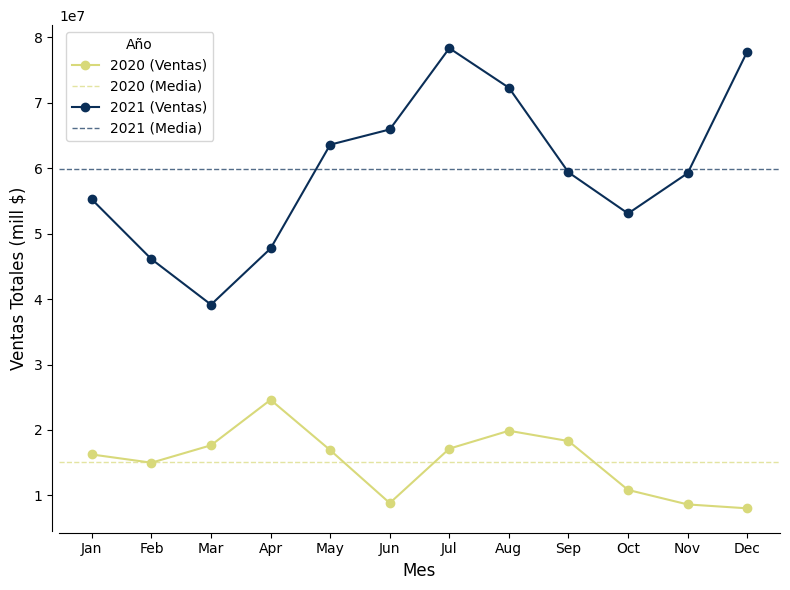

In [ ]:
# Agrupar por mes y año y sumar las ventas totales
monthly_sales = df.groupby(["year", "month"])["total_sales"].sum().reset_index()

# Pivoteamos para tener años como columnas
monthly_sales_pivot = monthly_sales.pivot(index="month", columns="year", values="total_sales")

# Cargar el colormap "Ernst" de pypalettes
cmap = load_cmap("Hokusai3")

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Generar una lista de colores basada en el número de años
colors = cmap(np.linspace(0, 1, len(monthly_sales_pivot.columns)))

# Graficar la evolución mensual para cada año
for i, year in enumerate(monthly_sales_pivot.columns):
    ax.plot(
        monthly_sales_pivot.index,
        monthly_sales_pivot[year],
        marker="o",
        label=f"{year} (Ventas)",
        color=colors[i]  # Asignar un color de la paleta
    )

    # Calcular la media de ventas para el año
    mean_sales = monthly_sales_pivot[year].mean()

    # Añadir una línea horizontal para la media
    ax.axhline(
        y=mean_sales,
        color=colors[i],
        linestyle="--",
        linewidth=1,
        alpha=0.7,
        label=f"{year} (Media)"
    )

# Configurar las etiquetas del eje X
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax.set_xticks(np.arange(1, 13))
ax.set_xticklabels(months, rotation=30, fontsize=8)

# Configurar el título, y las etiquetas de los ejes
ax.set_xlabel("Mes", fontsize=12)
ax.set_ylabel("Ventas Totales (mill $)", fontsize=12)

# Añadir la leyenda
ax.legend(title="Año")

# Personalizar los ejes y spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_position(('outward', 5))
plt.gca().spines['bottom'].set_position(('outward', 1))

#Descargar grafico
plt.savefig("evolucion mensual ventas.png", dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Ventas diarias

Ver en que dias de la semana se suele vender mas segun tienda.

---



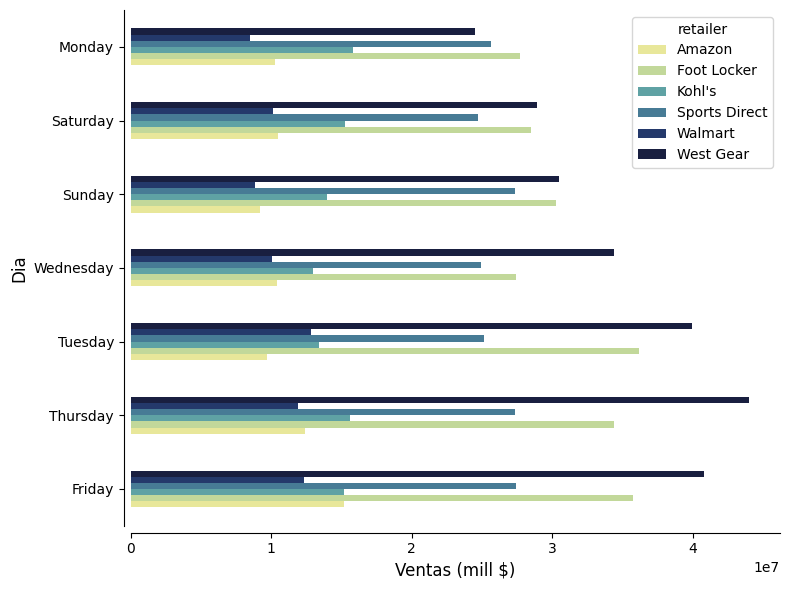

In [ ]:
bar(
    groupby_cols=["day_name", "retailer"],
    agg_col="total_sales",
    kind="barh",
    xlabel="Ventas (mill $)",
    ylabel="Dia",
    savefig="ventas dia semana.png"
)

Ver en que dias del mes se suele vender mas, como observamos hay mas ventas a mediados de mes y menos ventas a finales

---

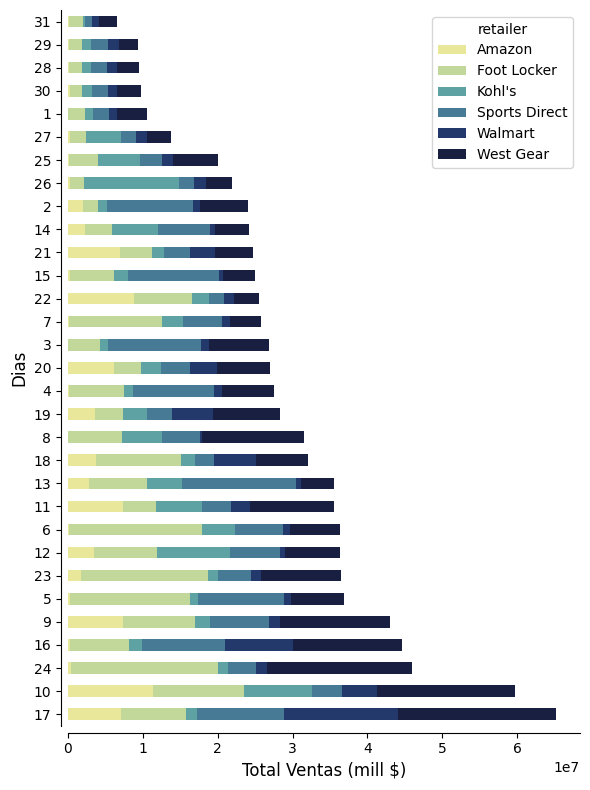

In [ ]:
bar(
    groupby_cols=["day", "retailer"],
    agg_col="total_sales",
    kind="barh",
    xlabel="Total Ventas (mill $)",
    ylabel="Dias",
    figsize=(6,8),
    stacked=True,
    savefig="ventas numero dia semana.png"
)

## Graficas cantidad y venta total

Observamos que aunque en los 2 años la cantidad de ventas sea mayor de manera

Online, en el año 2020 la suma de ventas online es muy baja en comparacion a la venta en tienda y outlet.

---



In [ ]:
df.groupby(["year", "sales_method"])["total_sales"].sum()

year  sales_method
2020  In store         93902990
      Online            4519966
      Outlet           83657697
2021  In store        262740575
      Online          243152845
      Outlet          211927720
Name: total_sales, dtype: int64

In [ ]:
df.groupby(["year", "sales_method"])["total_sales"].count()

year  sales_method
2020  In store         287
      Online           530
      Outlet           485
2021  In store        1453
      Online          4359
      Outlet          2534
Name: total_sales, dtype: int64

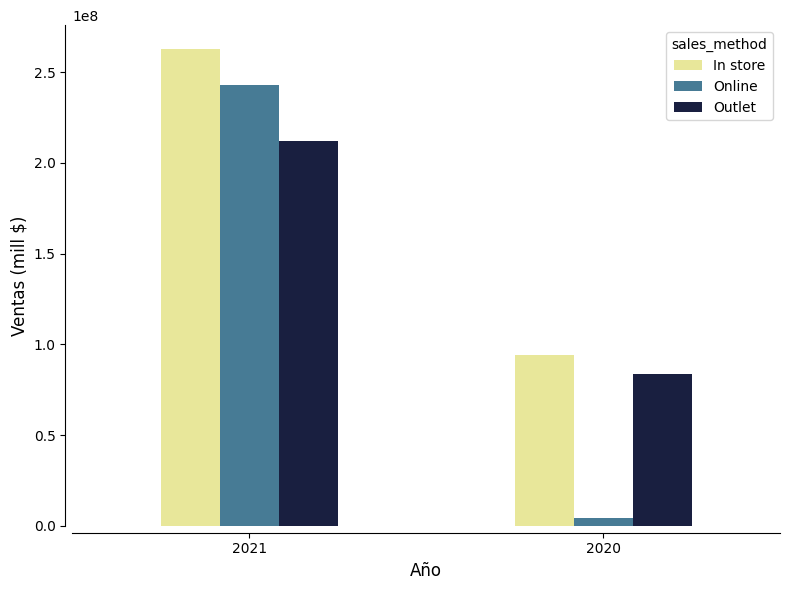

In [ ]:
bar(
    groupby_cols=["year", "sales_method"],
    agg_col="total_sales",
    kind="bar",
    xlabel="Año",
    ylabel="Ventas (mill $)",
    savefig="distribucion metodo venta.png"
)

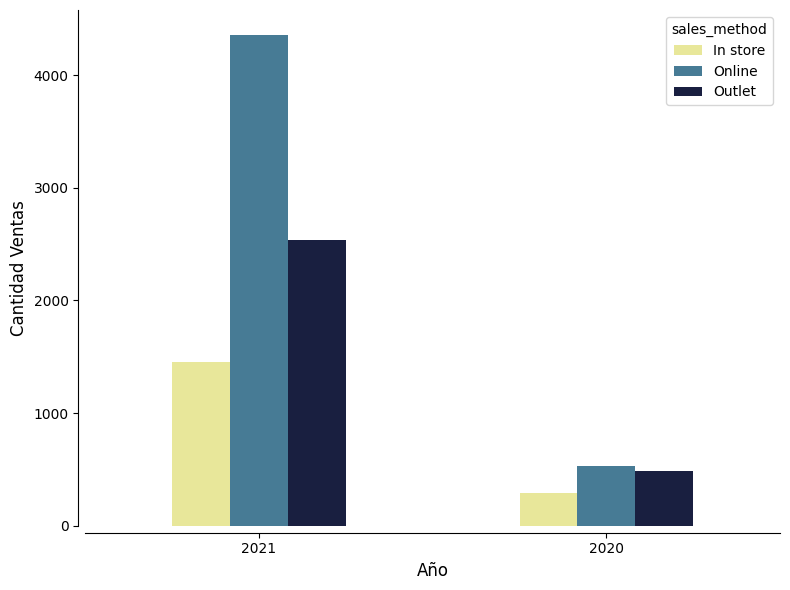

In [ ]:
bar(
    groupby_cols=["year", "sales_method"],
    agg_col="total_sales",
    kind="bar",
    xlabel="Año",
    ylabel="Cantidad Ventas",
    agg="size",
    savefig="ventas segun metodo.png"
)

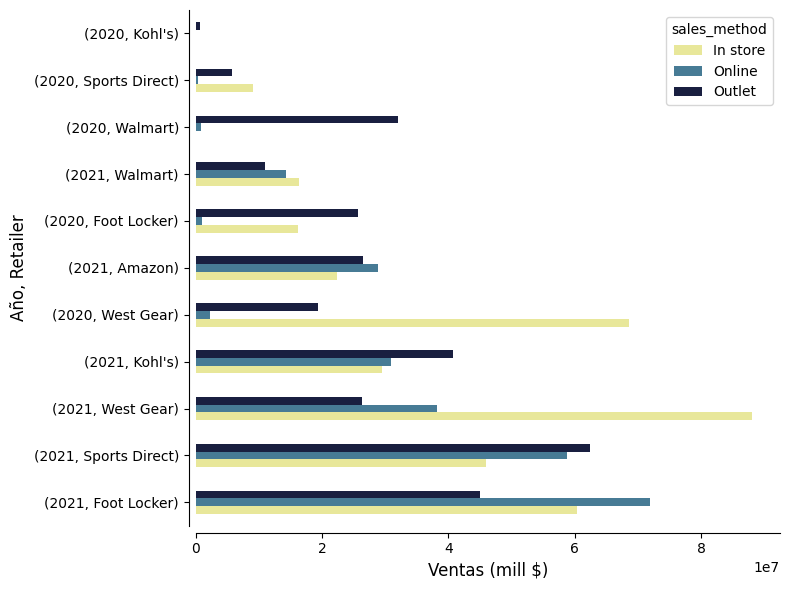

In [ ]:
bar(
    groupby_cols=["year", "retailer", "sales_method"],
    agg_col="total_sales",
    kind="barh",
    xlabel="Ventas (mill $)",
    ylabel="Año, Retailer",
    savefig="distribucion metodo venta tiendas.png"
)

Se observa la mejora de ventas con el cambio de año y como han crecido las ventas online desde la pandemia

---



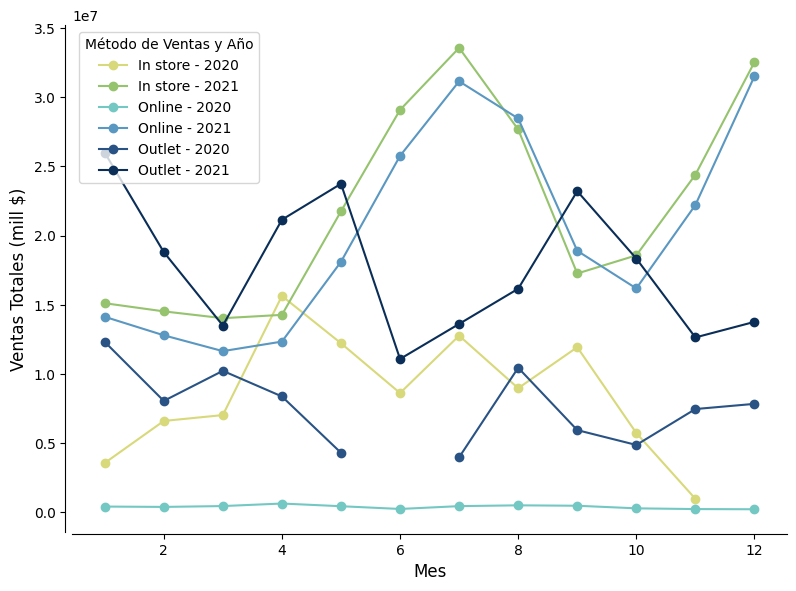

In [ ]:
# Agrupación por mes, año y método de ventas y suma de las ventas totales
evol_ventas_sum = df.groupby(["month", "year", "sales_method"])["total_sales"].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
months = range(1, 13)

# Tipos de métodos de ventas y años únicos
sales_methods = evol_ventas_sum["sales_method"].unique()
years = evol_ventas_sum["year"].unique()

# Cargar el colormap "Ernst" de pypalettes
cmap = load_cmap("Hokusai3")

# Generar una lista de colores basada en la cantidad de métodos de ventas y años combinados
colors = cmap(np.linspace(0, 1, len(sales_methods) * len(years)))

# Contador para asignar colores
color_idx = 0

# Subgráfico: Suma de ventas totales por tipo
for method in sales_methods:
    for year in years:
        # Filtrar por método de ventas y año
        filtre = (evol_ventas_sum["sales_method"] == method) & (evol_ventas_sum["year"] == year)
        # Reindexar para asegurar que estén todos los meses
        month_sum = evol_ventas_sum[filtre].set_index("month").reindex(months)["total_sales"]
        # Graficar con un color único de la paleta Ernst
        ax.plot(months, month_sum, marker="o", label=f"{method} - {year}", color=colors[color_idx])
        color_idx += 1

# Personalización del gráfico
ax.set_xlabel("Mes", fontsize=12)
ax.set_ylabel("Ventas Totales (mill $)", fontsize=12)
ax.legend(title="Método de Ventas y Año")

# Ajustar el diseño
plt.tight_layout()

# Configurar los spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 1))

#Descargar grafico
plt.savefig("Evolución Ventas segun Metodo.png", dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

## Graficos por genero

Observamos la distribucion de ventas por tipo de producto segun genero de la persona para asi saber que articulos tienen mas ventas segun su genero y en que estados se vende mas

---



In [ ]:
#Separar en genero y tipo de producto
df[["gender", "product_type"]] = df["product"].str.split("'s", expand=True)

In [ ]:
#Ver total ventas a hombres y mujeres
df.groupby("gender")["total_sales"].sum().reset_index()

,gender,total_sales
0,Men,486228369
1,Women,413673424


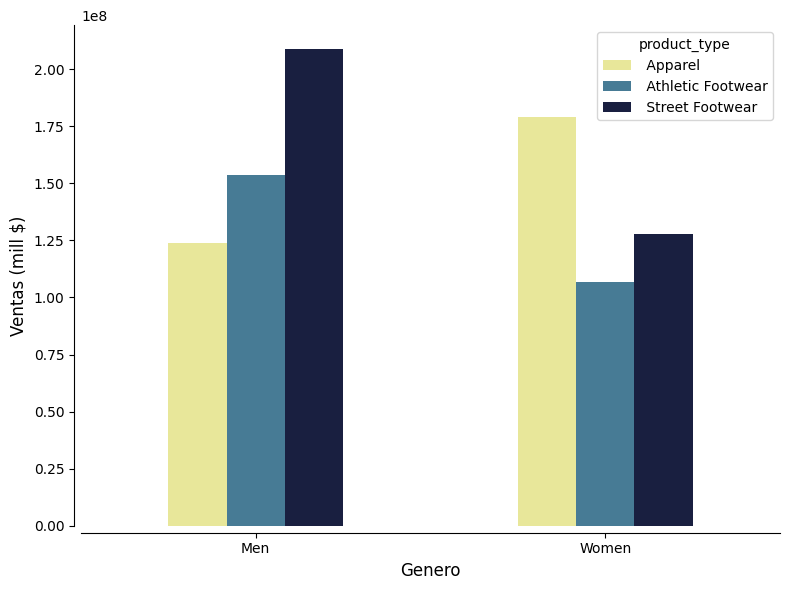

In [ ]:
bar(
    groupby_cols=["gender", "product_type"],
    agg_col="total_sales",
    kind="bar",
    xlabel="Genero",
    ylabel="Ventas (mill $)",
    savefig="comparacion ventas producto genero.png"
)

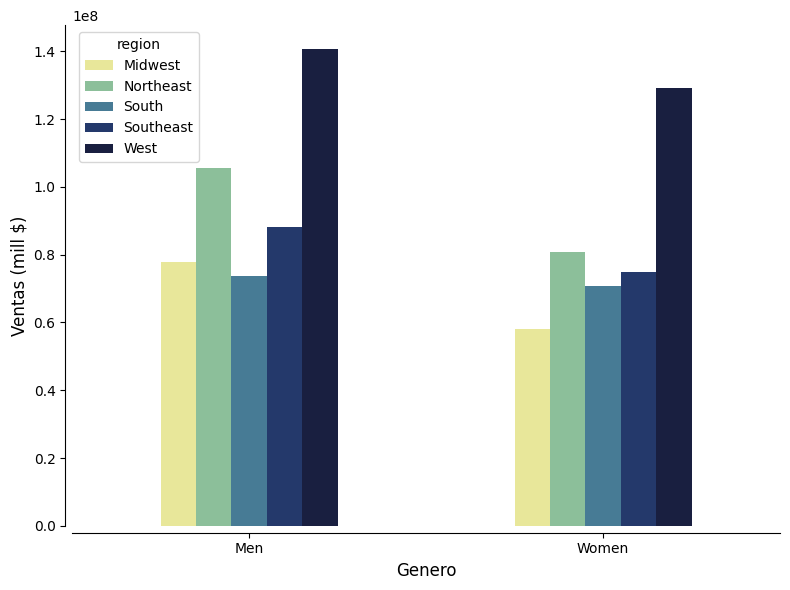

In [ ]:
bar(
    groupby_cols=["gender", "region"],
    agg_col="total_sales",
    kind="bar",
    xlabel="Genero",
    ylabel="Ventas (mill $)",
    savefig="comparacion ventas region genero.png"
)

## Margen y Beneficio

Clara caida de los beneficios a partir de la pandemia hasta recuperarse en el siguiente año.Tambien vemos un gran desplome en beneficios de los margenes en plena pandemia y surecuperacion meses despues

---



In [ ]:
df.pivot_table (
    values="operating_profit",
    index="month",
    columns="year",
    aggfunc='sum',
    margins=True,
    margins_name='Total'
)

year,2020,2021,Total
month,,,
1,5829956,19311682,25141638
2,5207314,16185179,21392493
3,5861964,14577554,20439518
4,9301256,18257704,27558960
5,5870817,24075142,29945959
6,2292710,24421772,26714482
7,4917631,29137024,34054655
8,7338878,27112277,34451155
9,7119675,23889635,31009310


In [ ]:
#FUNCION PARA CREAR GRAFICAS DE LINEAS
def plot(groupby_cols, value_col, xlabel, ylabel, savefig, agg="mean", cmap_name="Hokusai3"):
    # Agrupar por las columnas especificadas y calcular la media
    monthly_avg = df.groupby(groupby_cols)[value_col].agg(agg).reset_index()

    # Cargar el colormap
    cmap = load_cmap(cmap_name)

    # Generar una lista de colores basada en la cantidad de años
    unique_years = monthly_avg[groupby_cols[0]].unique()
    colors = cmap(np.linspace(0, 1, len(unique_years)))

    # Gráfica de evolución de la media de precios por mes
    plt.figure(figsize=(8, 6))

    # Contador para asignar colores
    color_idx = 0

    # Graficar la evolución mensual para cada año con colores de la paleta especificada
    for year in unique_years:
        plt.plot(monthly_avg[monthly_avg[groupby_cols[0]] == year]["month"],
                 monthly_avg[monthly_avg[groupby_cols[0]] == year][value_col],
                 marker="o", label=f"Año {year}", color=colors[color_idx])
        color_idx += 1

    # Personalización de la gráfica
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(title=groupby_cols[0].capitalize())

    # Ajustar el diseño
    plt.tight_layout()

    # Configuración de los spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_position(('outward', 5))
    plt.gca().spines['bottom'].set_position(('outward', 1))

    #Guardar grafico
    plt.savefig(savefig, dpi=300, bbox_inches='tight')

    # Mostrar la gráfica
    plt.show()

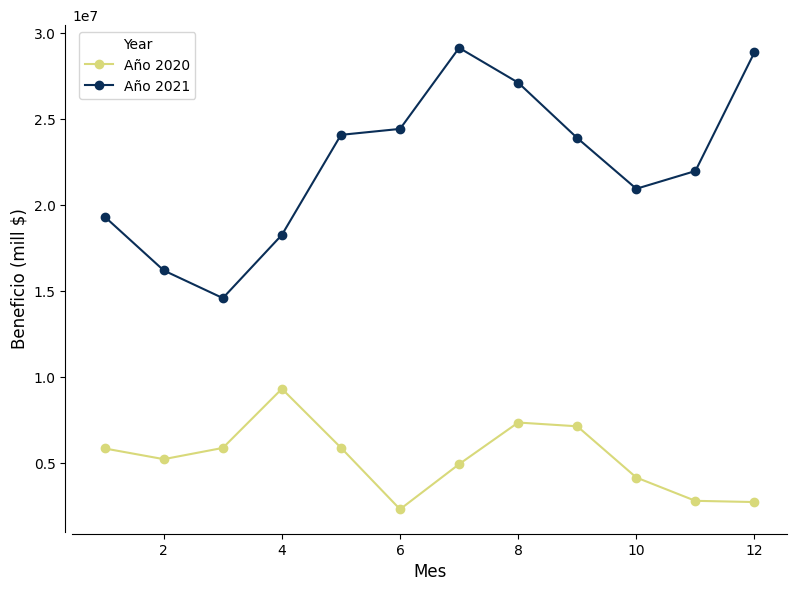

In [ ]:
plot(groupby_cols=["year", "month"],
     value_col="operating_profit",
     xlabel="Mes",
     ylabel="Beneficio (mill $)",
     agg="sum",
     savefig="evolucion beneficio mensual.png"
     )

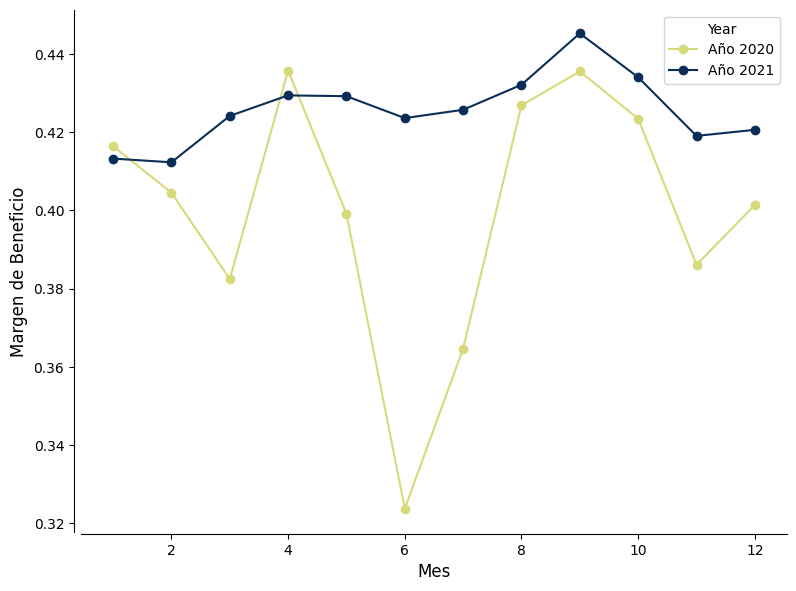

In [ ]:
plot(groupby_cols=["year", "month"],
     value_col="operating_margin",
     xlabel="Mes",
     ylabel="Margen de Beneficio",
     savefig="evolucion margen beneficio mensual.png"
     )

## Precio Unidades

Observamos que durante los primeros meses del confinamiento los precios se encarecian y posteriormente, al no haber ya tanta demanda por parte de los clientes los precios se desplomaron.Los precios dejaron de bajar a principios del año 2021 y a partir de entonces lo precios fueron subiendo paulatinamente hasta estar practicamente a mismo niveles prepandemicos a finales del año 2021

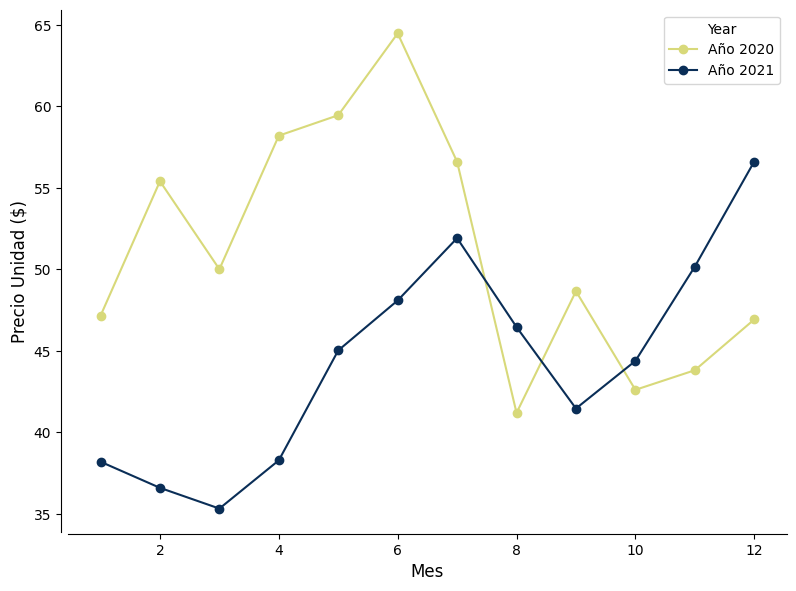

In [ ]:
plot(groupby_cols=["year", "month"],
     value_col="price_per_unit",
     xlabel="Mes",
     ylabel="Precio Unidad ($)",
     savefig="evolucion media precio productos mensual.png"
     )

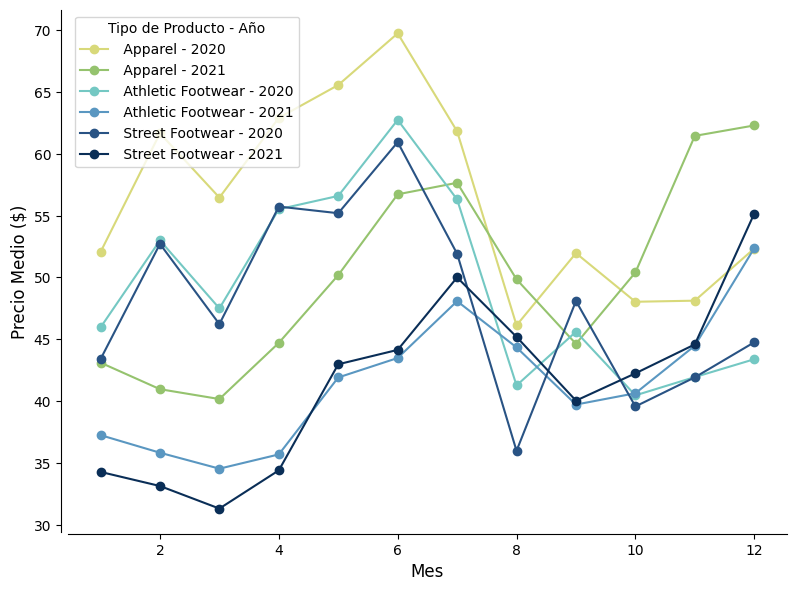

In [ ]:
# Agrupar por año, mes y tipo de producto para obtener la media de precios mensualmente
monthly_avg_price = df.groupby(["year", "month", "product_type"])["price_per_unit"].mean().reset_index()

# Cargar el colormap "Ernst"
cmap = load_cmap("Hokusai3")

# Crear una lista de colores basada en la cantidad de tipos de productos
products = monthly_avg_price["product_type"].unique()
years = monthly_avg_price["year"].unique()
colors = cmap(np.linspace(0, 1, len(products) * len(years)))

# Crear la figura
plt.figure(figsize=(8, 6))

# Contador para asignar colores
color_idx = 0

# Filtrar por cada tipo de producto y graficar la evolución de precios por mes y año
for product in products:
    for year in years:
        # Filtrar los datos según el tipo de producto y el año
        data_filtered = monthly_avg_price[(monthly_avg_price["product_type"] == product) & (monthly_avg_price["year"] == year)]

        # Graficar los datos, asignando un color único de la paleta "Ernst"
        plt.plot(data_filtered["month"], data_filtered["price_per_unit"],
                 marker="o", label=f"{product} - {year}", color=colors[color_idx])
        color_idx += 1

# Personalización del gráfico
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Precio Medio ($)", fontsize=12)
plt.legend(title="Tipo de Producto - Año", loc="upper left")

# Ajustar el diseño
plt.tight_layout()

# Configurar los spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_position(('outward', 5))
plt.gca().spines['bottom'].set_position(('outward', 1))

# Descargar grafico
plt.savefig("evolucion media precio tipo producto.png", dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()